In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot

In [2]:
link_to_data = examples.get_path('Guerry.shp')
gdf = gpd.read_file(link_to_data)

In [3]:
gdf.head(1)

,CODE_DE,COUNT,AVE_ID_,dept,Region,Dprtmnt,Crm_prs,Crm_prp,Litercy,Donatns,...,Infntcd,Dntn_cl,Lottery,Desertn,Instrct,Prsttts,Distanc,Area,Pop1831,geometry
0,01,1.0,49.0,1,E,Ain,28870,15890,37,5098,...,60,69,41,55,46,13,218.372,5762,346.03,"POLYGON ((801150.000 2092615.000, 800669.000 2..."


<AxesSubplot:>

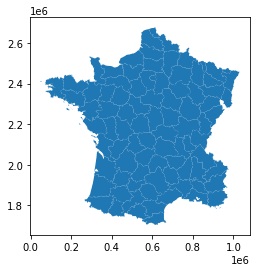

In [4]:
gdf.plot()

In [5]:
y = gdf['Donatns'].values
w = Queen.from_dataframe(gdf)
w.transform = 'r'

(<Figure size 864x720 with 1 Axes>, <AxesSubplot:>)

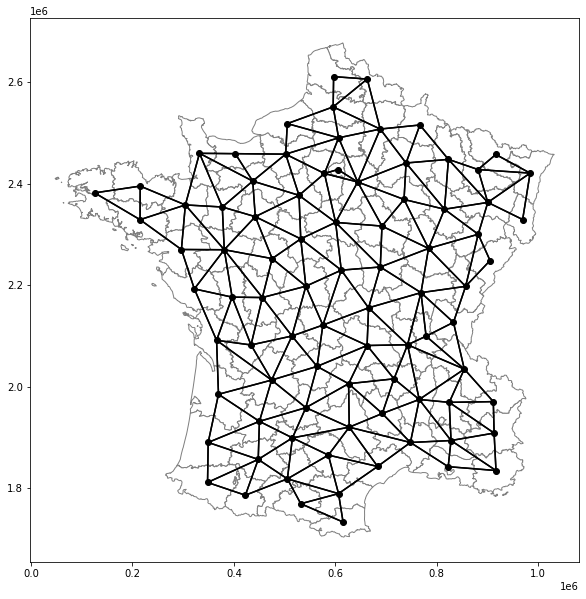

In [6]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
ax=gdf.plot(edgecolor='gray',facecolor='w',ax=ax)
w.plot(gdf,ax=ax)

#df1.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

In [7]:
from esda.moran import Moran

moran = Moran(y, w)
moran.I

0.3533613255848606

In [8]:
moran.y

array([ 5098,  8901, 10973,  2733,  6962,  3188,  6400,  3542,  3608,
        2582,  3211,  2314, 27830,  4093, 13602, 13254,  9561, 14993,
        2540, 10387, 10997,  4687,  3436,  2829, 11712,  4553, 23945,
        3048,  2286,  2848,  5076,  1680,  7686, 11315,  7254,  4077,
        3012, 12059,  5626,  3446,  2746,  8310,  4753,  5194,  4432,
        2040,  4410,  5179,  3963,  4013,  2107,  3912,  4196, 14739,
        9515, 10452,  6092,  5501,  9242,  5740,  5963,  3299,  6001,
       11644, 14472,  6001,  1983, 11701,  3710,  3357,  4204,  7245,
        5303,  4007, 16956,  4964,  3449,  4558,  2449,  1246, 14035,
        8922, 13817,  4040,  4276], dtype=int64)

In [9]:
y

array([ 5098,  8901, 10973,  2733,  6962,  3188,  6400,  3542,  3608,
        2582,  3211,  2314, 27830,  4093, 13602, 13254,  9561, 14993,
        2540, 10387, 10997,  4687,  3436,  2829, 11712,  4553, 23945,
        3048,  2286,  2848,  5076,  1680,  7686, 11315,  7254,  4077,
        3012, 12059,  5626,  3446,  2746,  8310,  4753,  5194,  4432,
        2040,  4410,  5179,  3963,  4013,  2107,  3912,  4196, 14739,
        9515, 10452,  6092,  5501,  9242,  5740,  5963,  3299,  6001,
       11644, 14472,  6001,  1983, 11701,  3710,  3357,  4204,  7245,
        5303,  4007, 16956,  4964,  3449,  4558,  2449,  1246, 14035,
        8922, 13817,  4040,  4276], dtype=int64)

In [10]:
import libpysal as lps

ylag = lps.weights.lag_spatial(w, y)
ylag

array([ 3195.5       ,  5370.5       ,  7354.83333333,  3371.5       ,
        3213.        ,  2776.        ,  5686.66666667,  5504.        ,
        4019.        ,  4520.2       ,  3437.42857143,  2247.66666667,
        8711.        ,  5691.16666667, 11527.2       , 10871.2       ,
        9019.33333333,  7458.5       ,  5824.57142857, 15456.66666667,
       11103.66666667, 10052.57142857,  7356.5       ,  3641.2       ,
        9729.66666667,  6449.5       , 12563.        ,  2279.83333333,
        3830.        ,  5439.16666667,  8608.        ,  3072.5       ,
        7522.        ,  9362.83333333,  6726.        ,  3917.66666667,
        5297.        ,  3913.75      ,  6798.83333333,  4662.85714286,
        3746.        , 10217.5       ,  6254.        ,  5995.66666667,
        5737.        ,  3257.2       ,  8578.375     , 11716.25      ,
        5403.5       ,  5008.        ,  5974.8       ,  8055.75      ,
        4465.6       , 12582.        ,  9192.        ,  5968.83333333,
      

In [11]:
b, a = np.polyfit(y, ylag, 1)
print(b,a)

0.35336132558486083 4087.4522249716347


In [12]:
import pysal.model as pymodel
yt = y
yt.shape = (len(y), 1)
ylagt = ylag
ylagt.shape = (len(ylag),1)

ols=pymodel.spreg.OLS(ylagt,yt)
print(ols.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     dep_var                Number of Observations:          85
Mean dependent var  :   6463.2127                Number of Variables   :           2
S.D. dependent var  :   2899.1622                Degrees of Freedom    :          83
R-squared           :      0.3514
Adjusted R-squared  :      0.3435
Sum squared residual:457964593.021                F-statistic           :     44.9589
Sigma-square        : 5517645.699                Prob(F-statistic)     :   2.278e-09
S.E. of regression  :    2348.967                Log likelihood        :    -779.345
Sigma-square ML     : 5387818.741                Akaike info criterion :    1562.690
S.E of regression ML:   2321.1675                Schwarz criterion     :    1567.575

----------------------------------------------------------------------------

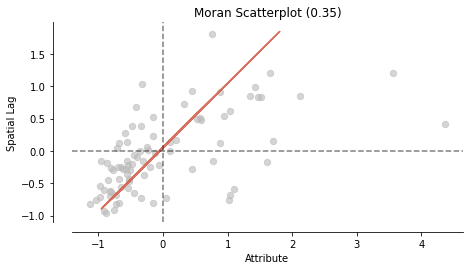

In [13]:
from splot.esda import moran_scatterplot

fig, ax = moran_scatterplot(moran)
plt.show()

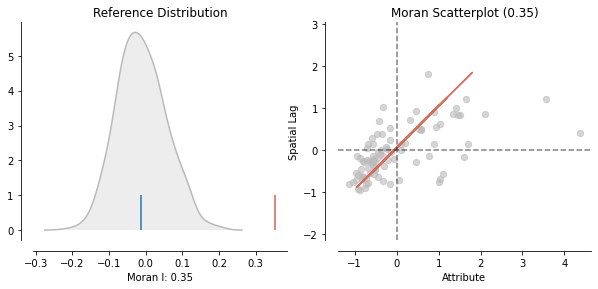

In [14]:
from splot.esda import plot_moran

plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

In [15]:
moran.p_sim

0.001

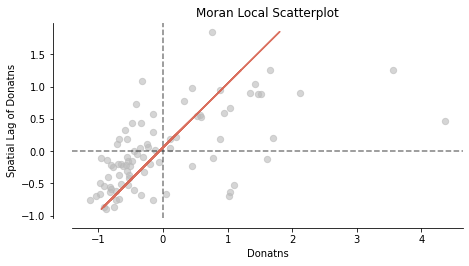

In [16]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

# calculate Moran_Local and plot
moran_loc = Moran_Local(y, w)
fig, ax = moran_scatterplot(moran_loc)
ax.set_xlabel('Donatns')
ax.set_ylabel('Spatial Lag of Donatns')
plt.show()

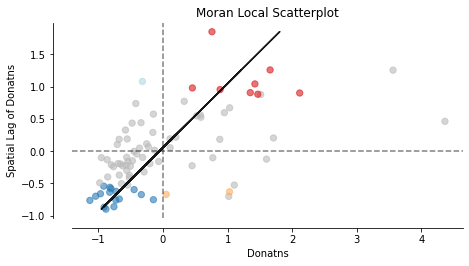

In [17]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Donatns')
ax.set_ylabel('Spatial Lag of Donatns')
plt.show()

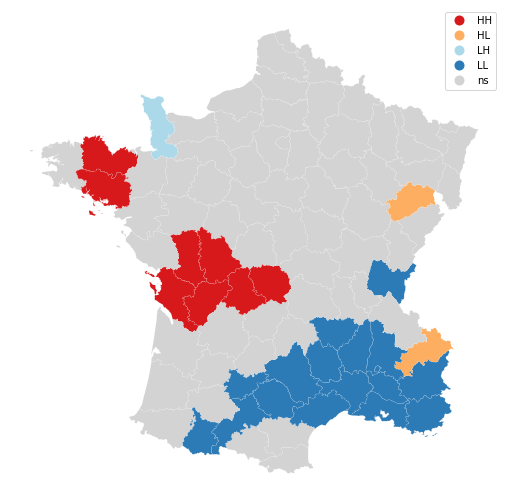

In [18]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, gdf, p=0.05, figsize = (9,9))
plt.show()

Exception: Data must be 1-dimensional

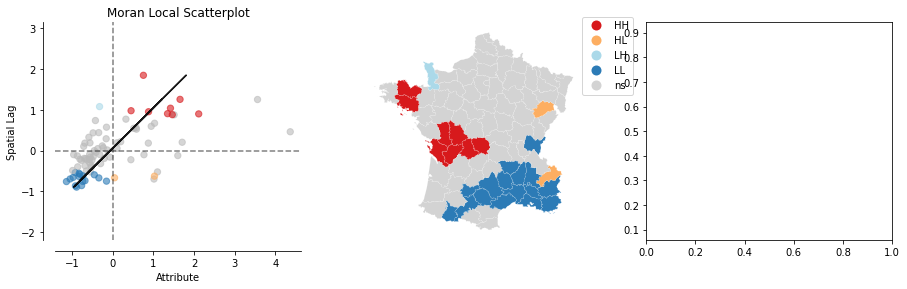

In [19]:
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc, gdf, 'Donatns')
plt.show()

Exception: Data must be 1-dimensional

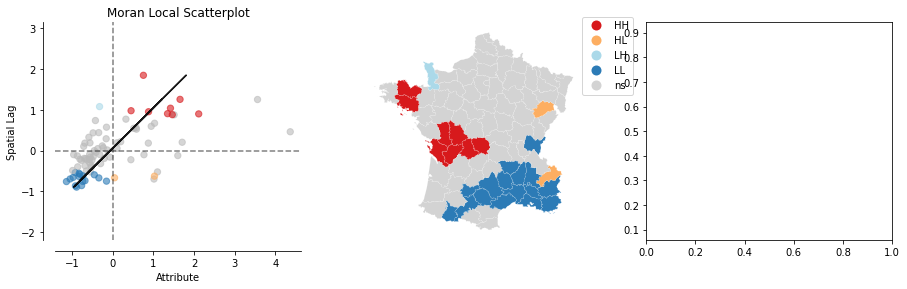

In [20]:
plot_local_autocorrelation(moran_loc, gdf, 'Donatns', quadrant=1)
plt.show()